In [15]:
%matplotlib inline

import os.path

import numpy as np
import pandas as pd
import geopandas as gp

import matplotlib.pyplot as plt
from geopy.point import Point
import geojson
import wget

import mplleaflet

In [2]:
wikisites = '/Users/karlen/Work/Insight/data/raw/sights/wiki_sights_updated6_29.csv'
sites_df = pd.read_csv(wikisites,index_col=[0])
sites_df = sites_df.dropna()

In [3]:
def deg2dec(coord):
    
    coords = coord.split()
    val = float(coords[0])+float(coords[1])/60.+float(coords[2])/3600.
    if coord[-1] in ['N','E']:
        return val
    elif coord[-1] in ['S','W']:
        return -val

def coord_to_point(coord):
    reform = lambda x: x.replace('°',' ').replace('′',' ').replace('″',' ')
    try:
        coord = deg2dec(reform(coord))
        return coord
    except:
        print('FUUUUUUUK')
        return float('nan')

In [48]:
sites_df

,title,lon,lat,thumb_im_url,full_im_url,filepath,lat_dec,lon_dec,geometry
0,5900_Wilshire,118°21′32″W,34°03′49″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/240px-5900Wilshire.jpg,34.063611,-118.358889,POINT (-118.3588888888889 34.06361111111111)
1,777_Tower,118°15′41″W,34°02′54″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/250px-777_Tower_Los_...,34.048333,-118.261389,POINT (-118.2613888888889 34.04833333333333)
2,Ahmanson_Theatre,118°14′50″W,34°3′29″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/220px-AhmansonTheatr...,34.058056,-118.247222,POINT (-118.2472222222222 34.05805555555555)
3,Alex_Theatre,118°15′17.20″W,34°8′55.62″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/250px-Alex_Theater.jpg,34.148783,-118.254778,POINT (-118.2547777777778 34.14878333333333)
4,"All_Saints_Episcopal_Church_(Pasadena,_Califor...",118°08′34″W,34°08′53″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/220px-AllSaintsEpisc...,34.148056,-118.142778,POINT (-118.1427777777778 34.14805555555556)
5,Alvarado_Terrace_Historic_District,118°16′50″W,34°2′42″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/default.png,34.045000,-118.280556,POINT (-118.2805555555556 34.04499999999999)
6,"Andalusia_(Los_Angeles,_California)",118°22′1″W,34°5′47″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/default.png,34.096389,-118.366944,POINT (-118.3669444444444 34.09638888888889)
7,"Angelino_Heights,_Los_Angeles",118°15′17″W,34°04′13″N,//upload.wikimedia.org/wikipedia/en/thumb/1/1b...,//upload.wikimedia.org/wikipedia/en/thumb/1/1b...,../data/raw/sights/thumbs/250px-AngelinoHts.jpg,34.070278,-118.254722,POINT (-118.2547222222222 34.07027777777778)
8,Angels_Flight,118°15′0.76″W,34°3′4.82″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/250px-Angels_Flight_...,34.051339,-118.250211,POINT (-118.2502111111111 34.05133888888889)
9,Angelus_Funeral_Home,118°15′28″W,34°0′43″N,//upload.wikimedia.org/wikipedia/commons/thumb...,//upload.wikimedia.org/wikipedia/commons/thumb...,../data/raw/sights/thumbs/250px-USA_Los_Angele...,34.011944,-118.257778,POINT (-118.2577777777778 34.01194444444445)


In [10]:
counter = 0
failed_img = []
for url in sites_df.thumb_im_url:
    try:
        wget.download('https:{}'.format(url),out='../data/raw/sights/thumbs')
    except:
        counter += 1
        failed_img.append(url)
        continue
print('failed on {} image downloads'.format(counter))

failed on 131 image downloads


In [55]:
count = 0
imlink = []
for url in sites_df.thumb_im_url:
    if url in failed_img:
        imlink.append("static/thumbs/default.png")
    else:
        imlink.append("static/thumbs/{}".format(os.path.basename(url)))

In [56]:
sites_df['filepath'] = imlink

In [44]:
sites_df = sites_df.dropna()
sites_df['lat_dec'] = sites_df.lat.apply(coord_to_point)
sites_df['lon_dec'] = sites_df.lon.apply(coord_to_point)
sites_df['geometry'] = gp.points_from_xy(sites_df.lon_dec,sites_df.lat_dec)

FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK
FUUUUUUUK


In [57]:
sites_geodf = gp.GeoDataFrame(sites_df, geometry='geometry')
sites_geodf = sites_geodf.dropna()

In [58]:
def data2geojson(df,filename='out.geojson'):
    features = []
    
    insert_features = lambda X: features.append(            
            geojson.Feature(geometry=X['geometry'],
                            properties={'title': X['title'], 'filepath': X['filepath']}))
    
    df.apply(insert_features, axis=1)
    with open(filename, 'w', encoding='utf8') as fp:
        geojson.dump(geojson.FeatureCollection(features), fp, sort_keys=True, ensure_ascii=False)

In [59]:
data2geojson(sites_geodf[['title','geometry','filepath']],filename='sites.geojson')

In [23]:
sites_geodf = sites_geodf[sites_geodf.lat_dec < 36.]

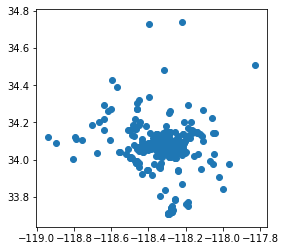

In [26]:
fig,ax = plt.subplots(1)
sites_geodf.plot(ax=ax)

In [28]:
mplleaflet.display(fig=fig)